In [83]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [84]:
X = torch.arange(-10, 10, 0.05).unsqueeze(dim=1)
y = X ** 3

In [85]:
X.shape, y.shape

(torch.Size([400, 1]), torch.Size([400, 1]))

In [86]:
X[:10], y[:10]

(tensor([[-10.0000],
         [ -9.9500],
         [ -9.9000],
         [ -9.8500],
         [ -9.8000],
         [ -9.7500],
         [ -9.7000],
         [ -9.6500],
         [ -9.6000],
         [ -9.5500]]),
 tensor([[-1000.0000],
         [ -985.0748],
         [ -970.2989],
         [ -955.6718],
         [ -941.1920],
         [ -926.8594],
         [ -912.6730],
         [ -898.6320],
         [ -884.7361],
         [ -870.9839]]))

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([240, 1]),
 torch.Size([240, 1]),
 torch.Size([160, 1]),
 torch.Size([160, 1]))

In [88]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})
  plt.grid()

In [89]:
# class TryNonLinearModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
#     def __init__(self):
#         super().__init__()
#         self.layer_1 = nn.Linear(in_features=1, out_features=10)
#         self.layer_2 = nn.Linear(in_features=10, out_features=10)
#         self.layer_3 = nn.Linear(in_features=10, out_features=10)
#         self.layer_4 = nn.Linear(in_features=10, out_features=10)
#         self.layer_5 = nn.Linear(in_features=10, out_features=1)
#         self.relu = nn.ReLU() # <- add in ReLU activation function

#     def forward(self, x):
#         return self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.relu(self.layer_1(x))))))

class TryNonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.sequential_layers = nn.Sequential(
            nn.Linear(in_features=1, out_features=10),
            nn.Linear(in_features=10, out_features=100),
            nn.Linear(in_features=100, out_features=100),
            nn.Linear(in_features=100, out_features=100),
            nn.Linear(in_features=100, out_features=100),
            nn.Linear(in_features=100, out_features=100),
            nn.Linear(in_features=100, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=1)
        )

    def forward(self, x):
        return self.sequential_layers(x)


In [90]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = TryNonLinearModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.7645],
         [ 0.8300],
         [-0.2343],
         [ 0.9186],
         [-0.2191],
         [ 0.2018],
         [-0.4869],
         [ 0.5873],
         [ 0.8815],
         [-0.7336]], requires_grad=True),
 Parameter containing:
 tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
         -0.4668,  0.2549], requires_grad=True),
 Parameter containing:
 tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
           0.0298, -0.3123],
         [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.10

In [91]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)


# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 160
Number of predictions made: 160
Predicted values:
tensor([[ 0.1232],
        [ 0.0563],
        [ 0.2841],
        [ 0.1219],
        [ 0.2301],
        [ 0.2382],
        [ 0.0264],
        [ 0.2292],
        [ 0.0636],
        [ 0.2003],
        [ 0.3057],
        [ 0.0068],
        [ 0.2634],
        [ 0.2490],
        [ 0.1949],
        [ 0.2760],
        [ 0.0575],
        [-0.0024],
        [ 0.0947],
        [-0.0079],
        [ 0.2445],
        [ 0.3003],
        [-0.0115],
        [ 0.0612],
        [ 0.3136],
        [-0.0146],
        [ 0.2113],
        [ 0.1025],
        [ 0.0656],
        [ 0.2203],
        [-0.0140],
        [ 0.1391],
        [ 0.0661],
        [ 0.2625],
        [ 0.0934],
        [ 0.2095],
        [ 0.2122],
        [ 0.0184],
        [ 0.1712],
        [ 0.1867],
        [-0.0054],
        [ 0.2643],
        [ 0.2454],
        [ 0.2913],
        [ 0.2400],
        [-0.0060],
        [ 0.1803],
        [ 0.1495],
       

In [92]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.0001) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lo

In [93]:
device = "cuda" if torch.cuda.is_available() else "cpu"
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
model_0 = model_0.to(device)

In [94]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 25_000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)


    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      epoch_count.append(epoch)
      train_loss_values.append(loss.cpu())
      test_loss_values.append(test_loss.cpu())

      # Print out what's happening
      if epoch % 1_000 == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 233.29751586914062 | MAE Test Loss: 275.30279541015625 


Epoch: 1000 | MAE Train Loss: 233.1242218017578 | MAE Test Loss: 275.1162109375 
Epoch: 2000 | MAE Train Loss: 232.9447784423828 | MAE Test Loss: 274.9319763183594 
Epoch: 3000 | MAE Train Loss: 232.4501495361328 | MAE Test Loss: 274.42657470703125 
Epoch: 4000 | MAE Train Loss: 222.0695037841797 | MAE Test Loss: 263.7154541015625 
Epoch: 5000 | MAE Train Loss: 115.13079833984375 | MAE Test Loss: 140.37228393554688 
Epoch: 6000 | MAE Train Loss: 115.10213470458984 | MAE Test Loss: 140.33251953125 
Epoch: 7000 | MAE Train Loss: 115.07386016845703 | MAE Test Loss: 140.29949951171875 
Epoch: 8000 | MAE Train Loss: 115.04515838623047 | MAE Test Loss: 140.2724151611328 
Epoch: 9000 | MAE Train Loss: 115.01275634765625 | MAE Test Loss: 140.26248168945312 
Epoch: 10000 | MAE Train Loss: 114.9790267944336 | MAE Test Loss: 140.2236785888672 
Epoch: 11000 | MAE Train Loss: 114.94108581542969 | MAE Test Loss: 140.20559692382812 
Epoch: 12000 | MAE Train Loss: 114.89753723144531 | MAE Test Loss: 1

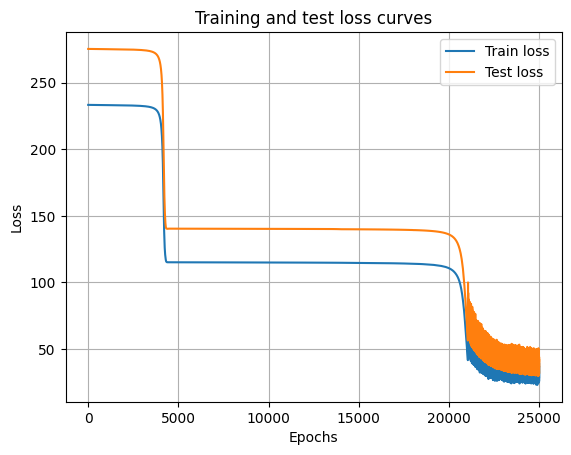

In [95]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.grid()

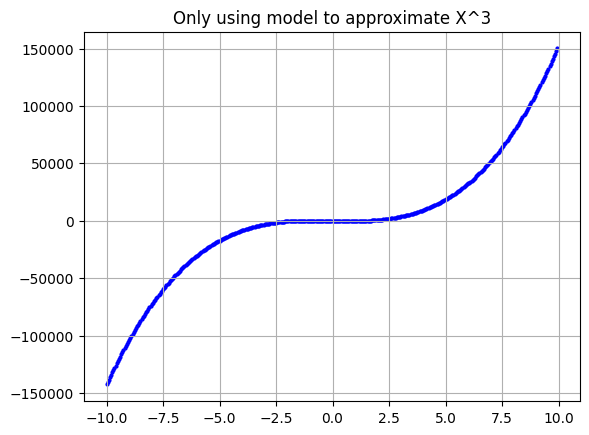

In [96]:
model_0 = model_0.to("cpu")
plt.title("Only using model to approximate X^3")
plt.scatter(X, model_0(y).detach().numpy(), c="b", s=4, label="Predictions")
plt.grid()